In [ ]:
pip install requests

Mounted at /content/drive
Detected file encoding: ascii 
Confidence: 1.0
Data file size: 70.0 kilobytes
File format: Delimited
File encoding: ascii
Data granularity: 
Number of records: 1000 
Shape:  (1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


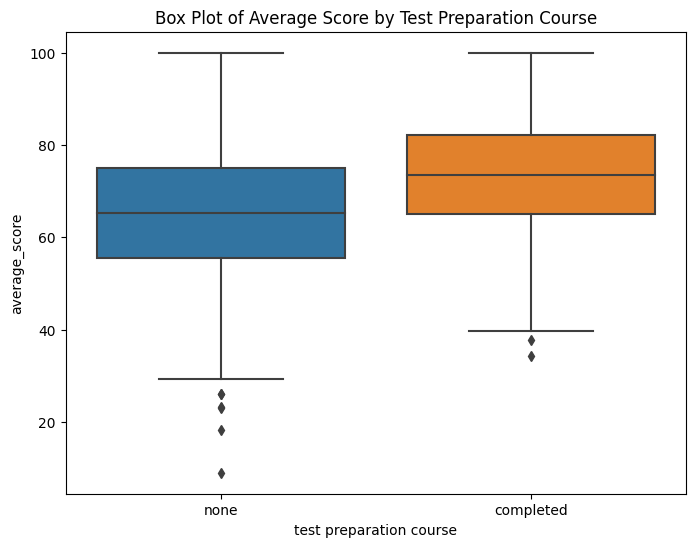

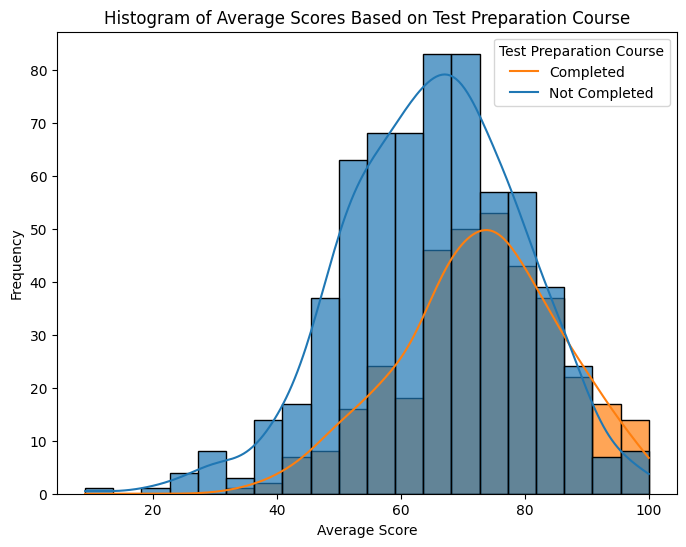

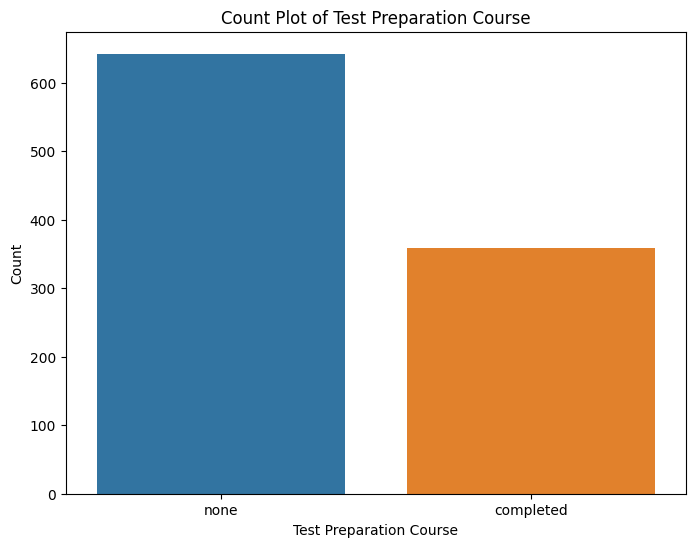

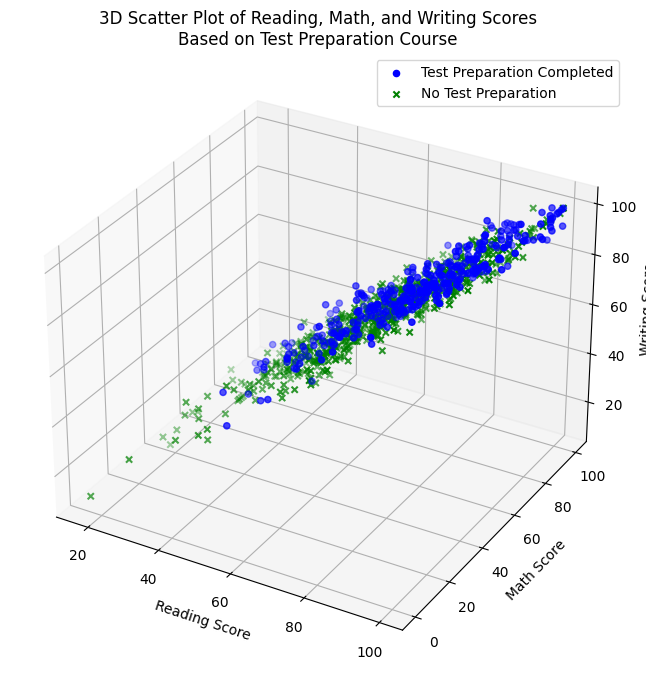

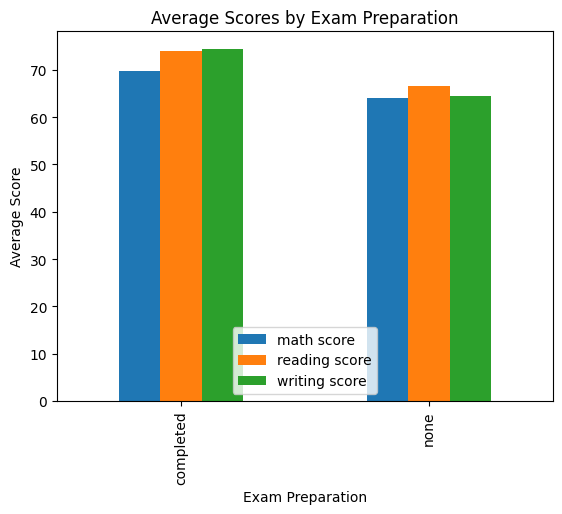

Students who completed the test preparation course have a significantly higher score.
Number of people scoring higher than 85 in math: 103
Students who completed the test preparation course have a significantly higher reading score.
Students who completed the test preparation course have a significantly higher writing score.
Interesting Findings:
- The bar plot illustrates the average scores in math, reading, and writing based on exam preparation.
- Students who completed the test preparation course have a significantly higher score (t-test).
- Students who completed the test preparation course have a significantly higher reading score (t-test).
- Students who completed the test preparation course have a significantly higher writing score (t-test).
  parental level of education
0           bachelor's degree
1                some college
2             master's degree
3          associate's degree
4                some college
0    1
1    0
2    1
3    1
4    1
Name: test preparation cou

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
import chardet
import os
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind

# Step 1: Ask at least two questions
# Predictive Question: Given a parent’s level of education, how likely are they going to have exam prep?
# Exploratory Question: Whether students who had exam prep have higher scores in our sample data?

# Step 2: Collect the data
# Provide the data source
data_source = "https://www.kaggle.com/datasets/spscientist/students-performance-in-exams"
# How was the data collected?
data_collection_source = "http://roycekimmons.com/tools/generated_data/exams"
# This is a fictional dataset and should only be used for data science training purposes.

# Reads data file from Google Drive
file_id = "1boOd8BVffLE914tY4n43Msyrvpx8LygS"
url = f"https://drive.google.com/uc?id={file_id}"
download = requests.get(url).content

# Detect the file encoding using chardet
detected_encoding = chardet.detect(download)['encoding']
confidence = chardet.detect(download)['confidence']
print("Detected file encoding:", detected_encoding, "\nConfidence:", confidence)

# Read the data using the detected encoding
df = pd.read_csv(io.StringIO(download.decode(detected_encoding)))

#create a path pointer to determine the format of the Student Performance file
#df_path = Path() / 'gdrive'/ 'MyDrive' /  'StudentsPerformance.csv'
#with df_path.open() as f:
 #   # Display first five lines of Student Performance
#    for _ in range(5):
#        print(f.readline(), end='')

# Step 3: Understand the data
# Determine the data file size
kib = 1024
file_size = os.path.getsize('/content/drive/MyDrive/StudentsPerformance.csv')
print("Data file size:", np.round(file_size / kib), "kilobytes")

# Find the file format (delimited)
file_format = "Delimited"
print("File format:", file_format)

# Determine the file encoding (using chardet)
file_encoding = detected_encoding
print("File encoding:", file_encoding)

# What is the granularity of the data? (assuming individual student records)
data_granularity = "Individual student records"
print("Data granularity:", "\nNumber of records:" , len(df), "\nShape: ",df.shape)

# Data Quality Check: Are there any outliers? Are there any missing or invalid entries?
# Outliers in math score
df.info()
outliers_math = df[df["math score"] > 100]
if not outliers_math.empty:
    print("There are outliers in the math score column.")
    # Data cleaning step: Replace outliers with the maximum valid score of 100
    df.loc[df["math score"] > 100, "math score"] = 100

# Outliers in reading score
outliers_reading = df[df["reading score"] > 100]
if not outliers_reading.empty:
    print("There are outliers in the reading score column.")
    # Data cleaning step: Replace outliers with the maximum valid score of 100
    df.loc[df["reading score"] > 100, "reading score"] = 100

# Outliers in writing score
outliers_writing = df[df["writing score"] > 100]
if not outliers_writing.empty:
    print("There are outliers in the writing score column.")
    # Data cleaning step: Replace outliers with the maximum valid score of 100
    df.loc[df["writing score"] > 100, "writing score"] = 100

# Missing or invalid entries
missing_values = df.isnull().sum()
if missing_values.any():
    print("There are missing or invalid entries in the data set.")
    # Data cleaning step: Handle missing values in "test preparation course" column with the most frequent value (mode)
    mode_prep_course = df["test preparation course"].mode().iloc[0]
    df["test preparation course"].fillna(mode_prep_course, inplace=True)


# Calculate the average of all scores for each student and create a new column 'average_score'
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Box plot of average score by test preparation course
plt.figure(figsize=(8, 6))
plt.title("Box Plot of Average Score by Test Preparation Course")
plt.xlabel("Test Preparation Course")
plt.ylabel("Average Score")
sns.boxplot(x="test preparation course", y="average_score", data=df)
plt.show()


# Histogram of average scores based on test preparation course:
plt.figure(figsize=(8, 6))
sns.histplot(df, x="average_score", hue="test preparation course", kde=True, bins=20, alpha=0.7)
plt.title("Histogram of Average Scores Based on Test Preparation Course")
plt.xlabel("Average Score")
plt.ylabel("Frequency")
plt.legend(title="Test Preparation Course", loc='upper right', labels=["Completed", "Not Completed"])
plt.show()

# Count plot of test preparation course:
plt.figure(figsize=(8, 6))
sns.countplot(x="test preparation course", data=df)
plt.title("Count Plot of Test Preparation Course")
plt.xlabel("Test Preparation Course")
plt.ylabel("Count")
plt.show()

# 3D Scatter Plot of Reading, Math, and Writing Scores Based on Test Preparation Course:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[df["test preparation course"] == "completed"]["reading score"],
           df[df["test preparation course"] == "completed"]["math score"],
           df[df["test preparation course"] == "completed"]["writing score"],
           c='blue', marker='o', label='Test Preparation Completed')
ax.scatter(df[df["test preparation course"] == "none"]["reading score"],
           df[df["test preparation course"] == "none"]["math score"],
           df[df["test preparation course"] == "none"]["writing score"],
           c='green', marker='x', label='No Test Preparation')
ax.set_xlabel('Reading Score')
ax.set_ylabel('Math Score')
ax.set_zlabel('Writing Score')
plt.title("3D Scatter Plot of Reading, Math, and Writing Scores\nBased on Test Preparation Course")
plt.legend(loc='upper right')
plt.show()


# Bar plot of exam preparation and average scores
avg_scores = df.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean()
avg_scores.plot(kind="bar")
plt.title("Average Scores by Exam Preparation")
plt.xlabel("Exam Preparation")
plt.ylabel("Average Score")
plt.show()

# Inferential analysis: Compare scores between students who completed the test preparation course and those who did not
completed_prep = df[df["test preparation course"] == "completed"]["math score"]
not_completed_prep = df[df["test preparation course"] == "none"]["math score"]

# Perform t-test
t_stat, p_value = ttest_ind(completed_prep, not_completed_prep)

# Determine the significance level
significance_level = 0.05

# Make a decision based on the p-value
if p_value < significance_level:
    print("Students who completed the test preparation course have a significantly higher score.")
else:
    print("There is not enough evidence to conclude a significant difference in scores.")

# Exploratory Question: How many people scored higher than 85 in math?
num_high_scores = len(df[df["math score"] > 85])
print("Number of people scoring higher than 85 in math:", num_high_scores)

# Inferential analysis for reading and writing scores: Compare scores between students who completed the test preparation course and those who did not
completed_prep_reading = df[df["test preparation course"] == "completed"]["reading score"]
not_completed_prep_reading = df[df["test preparation course"] == "none"]["reading score"]

completed_prep_writing = df[df["test preparation course"] == "completed"]["writing score"]
not_completed_prep_writing = df[df["test preparation course"] == "none"]["writing score"]

# Perform t-tests for reading and writing scores
t_stat_reading, p_value_reading = ttest_ind(completed_prep_reading, not_completed_prep_reading)
t_stat_writing, p_value_writing = ttest_ind(completed_prep_writing, not_completed_prep_writing)

# Determine the significance level for reading and writing scores
significance_level = 0.05

# Make a decision based on the p-values for reading and writing scores
if p_value_reading < significance_level:
    print("Students who completed the test preparation course have a significantly higher reading score.")
else:
    print("There is not enough evidence to conclude a significant difference in reading scores.")

if p_value_writing < significance_level:
    print("Students who completed the test preparation course have a significantly higher writing score.")
else:
    print("There is not enough evidence to conclude a significant difference in writing scores.")



# Interesting Findings
print("Interesting Findings:")
print("- The bar plot illustrates the average scores in math, reading, and writing based on exam preparation.")
print("- Students who completed the test preparation course have a significantly higher score (t-test).")
print("- Students who completed the test preparation course have a significantly higher reading score (t-test).")
print("- Students who completed the test preparation course have a significantly higher writing score (t-test).")


# Drop unnecessary columns
data = df.drop(['gender', 'race/ethnicity', 'lunch', 'math score', 'reading score', 'writing score', "average_score"], axis=1)
#data = data[data['parental level of education'] == 'some college']

# Encode the target variable
le = LabelEncoder()
data['test preparation course'] = le.fit_transform(data['test preparation course'])


# Separate features and target variable
X = data.drop(['test preparation course'], axis=1)
y = data['test preparation course']

#incicates that none is 1 while completed is 0
print(X.head())
print(y.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the target variable using LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)
# Map ordinal education categories to numerical values
education_categories = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]
oe = OrdinalEncoder(categories=[education_categories])
X_train['parental level of education'] = oe.fit_transform(X_train[['parental level of education']])
X_test['parental level of education'] = oe.transform(X_test[['parental level of education']])

# Create column transformer to handle one-hot encoding
column_transform = make_column_transformer(
    (OneHotEncoder(), ['parental level of education']),
    remainder='passthrough'
)

# Train the model using SGDClassifier with class weights
sgd_clf = SGDClassifier(class_weight='balanced', random_state=42)

# Define the pipeline with hyperparameter tuning
lm_pipeline = make_pipeline(column_transform, sgd_clf)

# Define the hyperparameter grid to search
param_grid = {
    'sgdclassifier__alpha': [0.0001, 0.001, 0.01, 0.1],
    'sgdclassifier__max_iter': [1000, 2000, 3000],
    'sgdclassifier__penalty': ['l1', 'l2'],
}

# Perform grid search with 5-fold cross-validation and F1-score as the evaluation metric
grid_search = GridSearchCV(lm_pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit the pipeline on the training data with hyperparameter tuning
grid_search.fit(X_train, y_train.ravel())  # Use ravel() to convert y_train to 1D array

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_test_pred = best_model.predict(X_test)
# Convert one-hot encoded y_test back to categorical labels
y_test_labels = lb.inverse_transform(y_test)
y_test_pred_labels = lb.inverse_transform(y_test_pred)


#report to see overall picture
print(classification_report(y_test_labels, y_test_pred_labels, target_names=['completed','none']))


# Calculate confusion matrix
cm = confusion_matrix(y_test_labels, y_test_pred_labels)
print("Confusion Matrix:")
print(cm)


# Calculate precision, recall, and F1-score
precision = precision_score(y_test_labels, y_test_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_test_pred_labels, average='weighted')
f1 = f1_score(y_test_labels, y_test_pred_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Get the best hyperparameters from the grid search
best_hyperparams = grid_search.best_params_
print("Best Hyperparameters:")
print(best_hyperparams)


# Make predictions on the test data using the best model (decision scores)
decision_scores = best_model.decision_function(X_test)


# You can use the trained encoder to inverse transform both X_train and X_test
print("Encoded X")
X_train_ML = X_train.copy()
X_test_ML = X_test.copy()

# Inverse transform parental level of education in X_train
X_train_ML['parental level of education'] = oe.inverse_transform(X_train_ML[['parental level of education']])

# Inverse transform parental level of education in X_test
X_test_ML['parental level of education'] = oe.inverse_transform(X_test_ML[['parental level of education']])


X_test_ML['Actual Test Preparation Course'] = y_test_labels
X_test_ML['Predicted Test Preparation Course'] = y_test_pred_labels
X_test_ML['Decision Score'] = decision_scores

# Display the first few rows of X_test with the original categorical values
print(X_test_ML.head())
